<a href="https://colab.research.google.com/github/jerrymart/Machine-Learning-Projects/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Packages / libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

#sns.set(rc={'figure.figsize':(12,10)})

In [2]:
df = pd.read_csv('/content/PM2.5-data.csv')

In [3]:
df.head()

,NitricOxide,NitrogenDioxide,OxidesofNitrogen,Ozone,WindSpeed,ResultantWindSpeed,ResultantWindDirection,MaximumWindGust,Std.Dev.WindDirection,OutdoorTemperature,DewPointTemperature,RelativeHumidity,SolarRadiation,PM2.5
0,19.6,35.8,55.5,2,1.9,1.5,215,3.6,39,67.7,23.3,18.6,0.000,37.1
1,2.5,2.8,4.4,37,23.3,22.6,276,38.5,14,86.4,32.3,14.5,1.110,40.9
2,2.3,3.1,4.5,41,23.7,23.2,281,40.4,12,87.2,30.2,12.9,0.841,36.7
3,1.9,3.0,4.1,42,25.0,24.7,282,41.9,10,86.7,29.0,12.5,0.509,36.4
4,0.4,7.1,8.1,50,25.1,24.7,283,42.3,9,59.6,13.2,16.1,0.450,65.9


**1. EDA analysis**

## (a) Obtain the histograms of both PM2.5 and the logarithm (natural base) of PM2.5
### and comment. Proceed with the log-transformed PM2.5 from this step on.

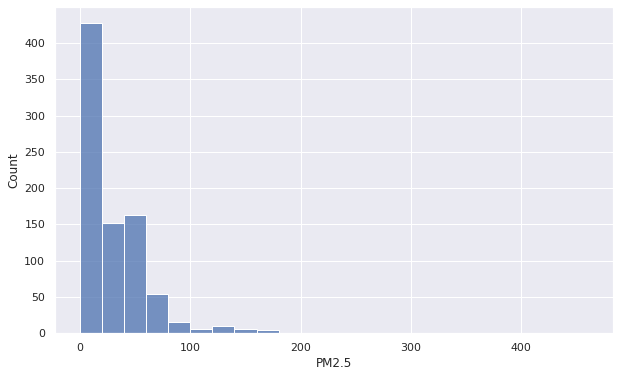

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x = 'PM2.5', binwidth = 20)

In [4]:
#Log of PM2.5

df['log_PM2.5'] = np.log(df['PM2.5'])

In [5]:
df['log_PM2.5']

0      3.613617
1      3.711130
2      3.602777
3      3.594569
4      4.188138
         ...   
840    2.701361
841    2.406945
842    2.433613
843    2.312535
844    2.140066
Name: log_PM2.5, Length: 845, dtype: float64

In [6]:
#Delete PM2.5 Column

df1 = df.drop(columns = ['PM2.5'])

In [7]:
#Inspect PM2.5 Columns
df1.head(2)

,NitricOxide,NitrogenDioxide,OxidesofNitrogen,Ozone,WindSpeed,ResultantWindSpeed,ResultantWindDirection,MaximumWindGust,Std.Dev.WindDirection,OutdoorTemperature,DewPointTemperature,RelativeHumidity,SolarRadiation,log_PM2.5
0,19.6,35.8,55.5,2,1.9,1.5,215,3.6,39,67.7,23.3,18.6,0.00,3.613617
1,2.5,2.8,4.4,37,23.3,22.6,276,38.5,14,86.4,32.3,14.5,1.11,3.711130


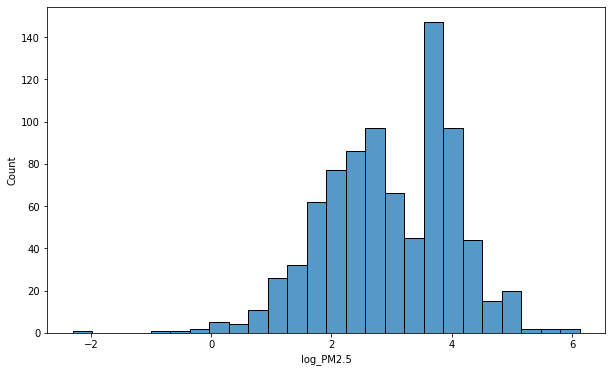

In [54]:
#Histogram of LogPM2.5

plt.figure(figsize=(10,6))
sns.histplot(data=df1,x = 'log_PM2.5')

## (b) Inspect the data and answer these questions: Are there any missing data? Among
## all the predictors, how many of them are continuous, integer counts, and categorical,
### respectively?

In [8]:
# Checking for null values

df1.isnull().sum()

NitricOxide               2
NitrogenDioxide           0
OxidesofNitrogen          1
Ozone                     0
WindSpeed                 0
ResultantWindSpeed        0
ResultantWindDirection    0
MaximumWindGust           0
Std.Dev.WindDirection     0
OutdoorTemperature        0
DewPointTemperature       0
RelativeHumidity          0
SolarRadiation            0
log_PM2.5                 0
dtype: int64

In [9]:
# Visualize the NULL observations

df1[df1['NitricOxide'].isnull()]

,NitricOxide,NitrogenDioxide,OxidesofNitrogen,Ozone,WindSpeed,ResultantWindSpeed,ResultantWindDirection,MaximumWindGust,Std.Dev.WindDirection,OutdoorTemperature,DewPointTemperature,RelativeHumidity,SolarRadiation,log_PM2.5
25,NaN,14.0,14.0,59,10.1,9.7,282,17.1,16,82.9,13.0,7.2,0.0,4.044804
26,NaN,15.1,15.1,52,9.8,9.6,284,15.1,12,79.8,12.2,7.6,0.0,3.802208


There are few missing values


In [13]:
#Replace NAs with mean values
#df1.dropna(inplace=True)
df1 = df1.dropna(subset = ['NitricOxide', 'OxidesofNitrogen'])

In [14]:
type(df1)

pandas.core.frame.DataFrame

In [15]:
df1.isnull().sum()

NitricOxide               0
NitrogenDioxide           0
OxidesofNitrogen          0
Ozone                     0
WindSpeed                 0
ResultantWindSpeed        0
ResultantWindDirection    0
MaximumWindGust           0
Std.Dev.WindDirection     0
OutdoorTemperature        0
DewPointTemperature       0
RelativeHumidity          0
SolarRadiation            0
log_PM2.5                 0
dtype: int64

In [16]:
# Investigate all the elements whithin each Feature 

for column in df1:
    unique_values = np.unique(df1[column])
    number_of_values = len(unique_values)
    if number_of_values <= 10:
        print("The number of distinct values for feature {} is: {} -- {}".format(column, number_of_values, unique_values))
    else:
        print("The number of distinct values for feature {} is: {}".format(column, number_of_values))

The number of distinct values for feature NitricOxide is: 283
The number of distinct values for feature NitrogenDioxide is: 327
The number of distinct values for feature OxidesofNitrogen is: 412
The number of distinct values for feature Ozone is: 65
The number of distinct values for feature WindSpeed is: 236
The number of distinct values for feature ResultantWindSpeed is: 233
The number of distinct values for feature ResultantWindDirection is: 270
The number of distinct values for feature MaximumWindGust is: 345
The number of distinct values for feature Std.Dev.WindDirection is: 70
The number of distinct values for feature OutdoorTemperature is: 444
The number of distinct values for feature DewPointTemperature is: 340
The number of distinct values for feature RelativeHumidity is: 424
The number of distinct values for feature SolarRadiation is: 347
The number of distinct values for feature log_PM2.5 is: 432


Continuous: All predictors are continuous

Integer counts:All predictors 

Categorical: Non is categorical

In [17]:
df1.shape

(842, 14)

### (c) Show a few interesting fndings about the data.

The log transform of the PM.25 is normally distributed

The unique occurence of each feature is just about the mean of total observations 

Checking for Multicolinearity as follow

## Check Multicolinearity

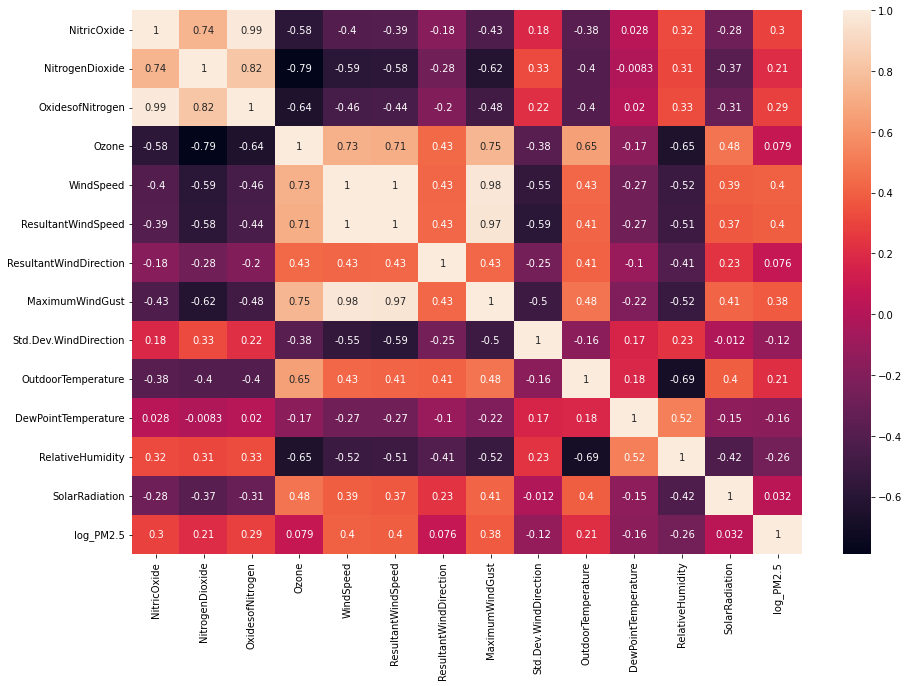

In [18]:
#Correlation matrix
plt.figure(figsize=(15,10)) #Set figure size

sns.heatmap(df1.corr(), annot=True)

## Pairing Multicolinear Features

In [19]:
correlatedColumns = []
corr = df1.corr()
indices = corr.index
columns = corr.columns
posthreshold = 0.85
negthreshold = -0.85

for c in columns:
    for r in indices:
        if c != r and (corr[c][r] > posthreshold or corr[c][r] < negthreshold):
            correlatedColumns.append({"column" : c , "row" : r , "val" :corr[c][r] })
            

print(correlatedColumns)


[{'column': 'NitricOxide', 'row': 'OxidesofNitrogen', 'val': 0.9917023020518446}, {'column': 'OxidesofNitrogen', 'row': 'NitricOxide', 'val': 0.9917023020518446}, {'column': 'WindSpeed', 'row': 'ResultantWindSpeed', 'val': 0.9972624762883218}, {'column': 'WindSpeed', 'row': 'MaximumWindGust', 'val': 0.9767960875266679}, {'column': 'ResultantWindSpeed', 'row': 'WindSpeed', 'val': 0.9972624762883218}, {'column': 'ResultantWindSpeed', 'row': 'MaximumWindGust', 'val': 0.967838022676794}, {'column': 'MaximumWindGust', 'row': 'WindSpeed', 'val': 0.9767960875266679}, {'column': 'MaximumWindGust', 'row': 'ResultantWindSpeed', 'val': 0.967838022676794}]


This show the features and the positions they are higly correlated with another feature

## Alternatively

We can delete the features that are highly correlated from the dataset as follows and use this henceforth

In [20]:
# Get correlation matrix 
corr = df1.corr()

# Create a mask for values above 90% 
# But also below 100% since it variables correlated with the same one
mask = (df1.corr() > 0.85) & (df1.corr() < 1.0)
high_corr = corr[mask]

# Create a new column mask using any() and ~
col_to_filter_out = ~high_corr[mask].any()

# Apply new mask
df_clean = df1[high_corr.columns[col_to_filter_out]]

# Visualize cleaned dataset
df_clean

,NitrogenDioxide,Ozone,ResultantWindDirection,Std.Dev.WindDirection,OutdoorTemperature,DewPointTemperature,RelativeHumidity,SolarRadiation,log_PM2.5
0,35.8,2,215,39,67.7,23.3,18.6,0.000,3.613617
1,2.8,37,276,14,86.4,32.3,14.5,1.110,3.711130
2,3.1,41,281,12,87.2,30.2,12.9,0.841,3.602777
3,3.0,42,282,10,86.7,29.0,12.5,0.509,3.594569
4,7.1,50,283,9,59.6,13.2,16.1,0.450,4.188138
...,...,...,...,...,...,...,...,...,...
840,20.2,16,278,11,66.6,36.8,33.3,0.041,2.701361
841,3.8,33,295,15,68.0,37.2,32.5,0.262,2.406945
842,0.2,37,289,18,68.9,36.5,30.4,0.580,2.433613
843,2.3,37,278,23,69.6,36.6,29.9,0.882,2.312535


### Investigate the distribution of the response

In [21]:
df1['log_PM2.5'].describe()

count    842.000000
mean       2.953747
std        1.080634
min       -2.302585
25%        2.208274
50%        2.965273
75%        3.792111
max        6.126651
Name: log_PM2.5, dtype: float64

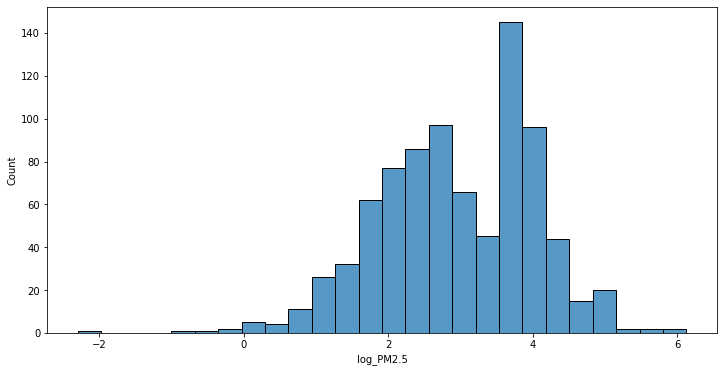

In [22]:
plt.figure(figsize=(12,6))

sns.histplot(x= df1['log_PM2.5'])

#### PM.25 at value -2 happens to be an outlier

Only few log_PM2.5 have values around 6 which is the maximum, more of the values have avg. values of 2.9

Also most values fall within 2-5

We should expect most of our predicted values to lie between 2-5 mostly

Also, it is observed that the features are in different scales, so we need to standardize the data

## Standardize The Data

In [65]:
df1.columns

Index(['NitricOxide', 'NitrogenDioxide', 'OxidesofNitrogen', 'Ozone',
       'WindSpeed', 'ResultantWindSpeed', 'ResultantWindDirection',
       'MaximumWindGust', 'Std.Dev.WindDirection', 'OutdoorTemperature',
       'DewPointTemperature', 'RelativeHumidity', 'SolarRadiation',
       'log_PM2.5'],
      dtype='object')

In [23]:
from sklearn.preprocessing import MinMaxScaler
# Scaling our columns except the target
scale_vars = ['NitricOxide', 'NitrogenDioxide', 'OxidesofNitrogen', 'Ozone',
       'WindSpeed', 'ResultantWindSpeed', 'ResultantWindDirection',
       'MaximumWindGust', 'Std.Dev.WindDirection', 'OutdoorTemperature',
       'DewPointTemperature', 'RelativeHumidity', 'SolarRadiation']

scaler = MinMaxScaler()
df1[scale_vars] = scaler.fit_transform(df1[scale_vars]) #df1[scale_vars] -> making the array  to a dataframe

df1.head(2)

,NitricOxide,NitrogenDioxide,OxidesofNitrogen,Ozone,WindSpeed,ResultantWindSpeed,ResultantWindDirection,MaximumWindGust,Std.Dev.WindDirection,OutdoorTemperature,DewPointTemperature,RelativeHumidity,SolarRadiation,log_PM2.5
0,0.072750,0.531768,0.161457,0.042254,0.050157,0.047468,0.594972,0.059140,0.445946,0.540264,0.421555,0.138741,0.000000,3.613617
1,0.020037,0.075967,0.022560,0.535211,0.721003,0.715190,0.765363,0.684588,0.108108,0.814056,0.544338,0.094984,0.707006,3.711130


# 2. Linear Regression:

### (a) Fit the full model where the response variable is the log-transformed PM2.5.

In [24]:
X = df1.drop('log_PM2.5', axis = 1).values
X

array([[0.07274969, 0.53176796, 0.16145692, ..., 0.42155525, 0.13874066,
        0.        ],
       [0.02003699, 0.07596685, 0.02256048, ..., 0.54433834, 0.09498399,
        0.70700637],
       [0.01942047, 0.0801105 , 0.02283229, ..., 0.51568895, 0.07790822,
        0.53566879],
       ...,
       [0.00739827, 0.04005525, 0.01032889, ..., 0.60163711, 0.26467449,
        0.36942675],
       [0.01140567, 0.06906077, 0.0187551 , ..., 0.60300136, 0.25933831,
        0.56178344],
       [0.01233046, 0.06906077, 0.01848328, ..., 0.60163711, 0.22732124,
        0.7388535 ]])

In [26]:
y = df1['log_PM2.5']
y

0      3.613617
1      3.711130
2      3.602777
3      3.594569
4      4.188138
         ...   
840    2.701361
841    2.406945
842    2.433613
843    2.312535
844    2.140066
Name: log_PM2.5, Length: 842, dtype: float64

In [27]:
#Split the data into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

In [28]:
#Linear Regressors
from sklearn.linear_model import LinearRegression

# Training the Regression
lm = LinearRegression(fit_intercept = True)     #fit_intercept = True => so we can make some predictions later on

lm.fit(X_train, y_train)

LinearRegression()

###(b) Find the coefficients of the predictors

In [29]:
lm.coef_ 

array([10.87148945,  3.77717721, -9.97291313, -0.60408975, -1.19470066,
        3.43629743, -0.65043432,  1.66355729,  0.92235832,  1.95905329,
       -1.2081038 ,  0.54614268, -0.45615011])

In [30]:
import statsmodels.api as sm

sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [31]:
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:              log_PM2.5   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              1186.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:25:51   Log-Likelihood:                         -906.74
No. Observations:                 842   AIC:                                      1839.
Df Residuals:                     829   BIC:                                      1901.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------